In [744]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine
import math 
import random
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import dateutil.parser
%matplotlib inline 
%config InlineBackend.figure_format = 'png'

# Importing Data for 5 months

In [745]:
#loading data
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [181229,181222,181215 , 181208 , 181201,180825,180818,180811,180804,180728,180721,180714,180707,
180623,180616,180609,180602,180127,180120,180113,180106]

turnstiles = get_data(week_nums)

turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,03:00:00,REGULAR,6881995,2333630
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,07:00:00,REGULAR,6882006,2333643
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,11:00:00,REGULAR,6882062,2333740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,15:00:00,REGULAR,6882243,2333800
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,19:00:00,REGULAR,6882590,2333868


In [746]:
turnstiles.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
200660,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,04:00:00,REGULAR,2448082,27552
200661,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,08:00:00,REGULAR,2448175,27559
200662,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,12:00:00,REGULAR,2448484,27568
200663,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,16:00:00,REGULAR,2448641,27578
200664,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,20:00:00,REGULAR,2448770,27578


In [747]:
turnstiles.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
56889,N094,R029,01-06-01,WORLD TRADE CTR,ACE23,IND,07/17/2018,20:00:00,REGULAR,202980,43020
163165,R302,R324,01-00-02,116 ST,23,IRT,08/22/2018,13:00:00,REGULAR,7651288,1352813
27131,E009,R370,00-00-01,71 ST,D,BMT,12/04/2018,03:00:00,REGULAR,6272355,2702947
194089,S101A,R070,01-00-02,ST. GEORGE,1,SRT,07/25/2018,12:00:00,REGULAR,3260165,20237
78718,N319,R298,01-06-02,NORTHERN BLVD,MR,IND,08/19/2018,21:00:00,REGULAR,21950,28327


In [748]:
turnstiles.shape

(4164842, 11)

In [749]:
turnstiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4164842 entries, 0 to 200664
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

# Connect Python to a Database

In [750]:
engine=create_engine('sqlite:///MTA_dataset.db')
turnstiles.to_sql('MTA_Table',engine,if_exists='replace',index=False)

In [751]:
engine=create_engine('sqlite:///MTA_dataset.db')
tables = engine.table_names()
print(tables)

['MTA_Table']


<ipython-input-751-23c0f7645092>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  tables = engine.table_names()


In [752]:
turnstiles_sql=pd.read_sql('select * from MTA_Table limit 5;',engine)
turnstiles_sql

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,03:00:00,REGULAR,6881995,2333630
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,07:00:00,REGULAR,6882006,2333643
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,11:00:00,REGULAR,6882062,2333740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,15:00:00,REGULAR,6882243,2333800
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,19:00:00,REGULAR,6882590,2333868


In [753]:
turnstiles_sql=pd.read_sql('select count(*) from MTA_Table limit 5;',engine)
turnstiles_sql

,count(*)
0,4164842


# Data Cleaning

Check for NULL values

In [754]:
turnstiles.isna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
200660,False,False,False,False,False,False,False,False,False,False,False
200661,False,False,False,False,False,False,False,False,False,False,False
200662,False,False,False,False,False,False,False,False,False,False,False
200663,False,False,False,False,False,False,False,False,False,False,False


In [755]:
turnstiles.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [756]:
turnstiles.dropna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,03:00:00,REGULAR,6881995,2333630
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,07:00:00,REGULAR,6882006,2333643
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,11:00:00,REGULAR,6882062,2333740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,15:00:00,REGULAR,6882243,2333800
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,19:00:00,REGULAR,6882590,2333868
...,...,...,...,...,...,...,...,...,...,...,...
200660,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,04:00:00,REGULAR,2448082,27552
200661,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,08:00:00,REGULAR,2448175,27559
200662,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,12:00:00,REGULAR,2448484,27568
200663,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,16:00:00,REGULAR,2448641,27578


Check for columns name

In [757]:
turnstiles.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [758]:
turnstiles.columns.unique()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [759]:
# the following code will remove any whitespace from all column names.
turnstiles.columns = [column.strip() for column in turnstiles.columns]
turnstiles.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [760]:
turnstiles.columns.unique()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [761]:
turnstiles.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [762]:
turnstiles['C/A'].value_counts()

PTH22    37665
PTH05    21532
R610     19635
PTH07    19141
R101     19133
         ...  
A085       882
D010       720
R108A      630
R109       630
D003       516
Name: C/A, Length: 749, dtype: int64

In [763]:
turnstiles.STATION.value_counts()

34 ST-PENN STA     86670
FULTON ST          85101
23 ST              61130
GRD CNTRL-42 ST    58424
CANAL ST           51553
                   ...  
RIT-MANHATTAN       2488
238 ST              2379
CLEVELAND ST        1764
SUTTER AV           1749
39 AV               1056
Name: STATION, Length: 379, dtype: int64

In [764]:
turnstiles.ENTRIES.value_counts()

0            68350
1            26394
2            12707
3             9870
117440512     9594
             ...  
3471895          1
1312879          1
1374321          1
1359990          1
7436847          1
Name: ENTRIES, Length: 2893436, dtype: int64

In [765]:
turnstiles.EXITS.value_counts()

0           156812
16777216     10625
65536         4099
3             3921
1             2885
             ...  
4427994          1
3671040          1
4715518          1
4713469          1
3906552          1
Name: EXITS, Length: 2662723, dtype: int64

In [766]:
# outliers
Q3= turnstiles.ENTRIES.quantile(q=0.75)
Q1= turnstiles.ENTRIES.quantile(q=0.25)
IQR = Q3 - Q1 
outliers = Q3 + 1.5 * IQR
outliers

16584790.125

/Users/renadalbishri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

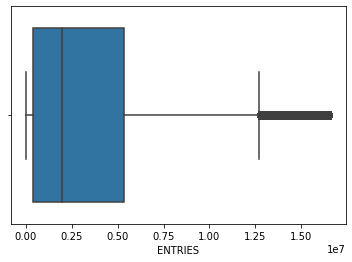

In [767]:
sns.boxplot(turnstiles[turnstiles.ENTRIES<= outliers].ENTRIES)

In [768]:
#removing outliers 
turnstiles = turnstiles[(turnstiles.ENTRIES<=outliers)]

In [769]:
turnstiles.shape

(3768129, 11)

In [770]:
# outliers
q3= turnstiles.EXITS.quantile(q=0.75)
q1= turnstiles.EXITS.quantile(q=0.25)
Iqr = q3 - q1 
OUTLIERS = q3 + 1.5 * Iqr
OUTLIERS

9388437.0

/Users/renadalbishri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXITS'>

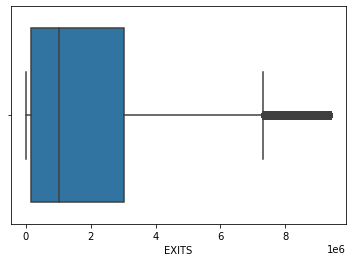

In [771]:
sns.boxplot(turnstiles[turnstiles.EXITS<= OUTLIERS].EXITS)

In [772]:
#removing outliers 
turnstiles = turnstiles[(turnstiles.EXITS<=OUTLIERS)]

In [773]:
turnstiles.shape

(3488769, 11)

/Users/renadalbishri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

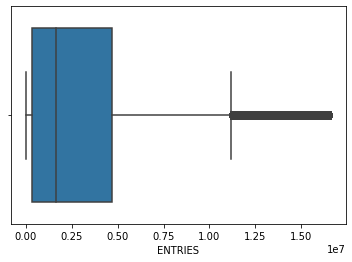

In [774]:
sns.boxplot(turnstiles.ENTRIES)

# Adding new column with transformed data and time from DATE and TIME columns

In [775]:
turnstiles["DATE_TIME"] = pd.to_datetime(turnstiles.DATE + " " + turnstiles.TIME, 
                                            format="%m/%d/%Y       %H:%M:%S")

Adding INDEX_OF_WEEKDAYS, MONTH Columns

In [776]:
turnstiles['INDEX_OF_WEEKDAYS'] = turnstiles.DATE_TIME.dt.weekday
turnstiles['MONTH'] = turnstiles.DATE_TIME.dt.month_name()
turnstiles['YEAR'] = turnstiles.DATE_TIME.dt.year

In [777]:
turnstiles.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,INDEX_OF_WEEKDAYS,MONTH,YEAR
200660,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,04:00:00,REGULAR,2448082,27552,2018-01-05 04:00:00,4,January,2018
200661,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,08:00:00,REGULAR,2448175,27559,2018-01-05 08:00:00,4,January,2018
200662,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,12:00:00,REGULAR,2448484,27568,2018-01-05 12:00:00,4,January,2018
200663,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,16:00:00,REGULAR,2448641,27578,2018-01-05 16:00:00,4,January,2018
200664,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,20:00:00,REGULAR,2448770,27578,2018-01-05 20:00:00,4,January,2018


In [778]:
turnstiles = turnstiles[turnstiles['MONTH'] != 'November']
turnstiles.head(40)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,INDEX_OF_WEEKDAYS,MONTH,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,03:00:00,REGULAR,6881995,2333630,2018-12-22 03:00:00,5,December,2018
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,07:00:00,REGULAR,6882006,2333643,2018-12-22 07:00:00,5,December,2018
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,11:00:00,REGULAR,6882062,2333740,2018-12-22 11:00:00,5,December,2018
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,15:00:00,REGULAR,6882243,2333800,2018-12-22 15:00:00,5,December,2018
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,19:00:00,REGULAR,6882590,2333868,2018-12-22 19:00:00,5,December,2018
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,23:00:00,REGULAR,6882787,2333916,2018-12-22 23:00:00,5,December,2018
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,03:00:00,REGULAR,6882830,2333933,2018-12-23 03:00:00,6,December,2018
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,07:00:00,REGULAR,6882834,2333939,2018-12-23 07:00:00,6,December,2018
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,11:00:00,REGULAR,6882878,2333982,2018-12-23 11:00:00,6,December,2018
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,15:00:00,REGULAR,6883024,2334025,2018-12-23 15:00:00,6,December,2018


In [779]:
turnstiles = turnstiles[turnstiles['MONTH'] != 'May']
turnstiles.head(40)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,INDEX_OF_WEEKDAYS,MONTH,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,03:00:00,REGULAR,6881995,2333630,2018-12-22 03:00:00,5,December,2018
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,07:00:00,REGULAR,6882006,2333643,2018-12-22 07:00:00,5,December,2018
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,11:00:00,REGULAR,6882062,2333740,2018-12-22 11:00:00,5,December,2018
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,15:00:00,REGULAR,6882243,2333800,2018-12-22 15:00:00,5,December,2018
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,19:00:00,REGULAR,6882590,2333868,2018-12-22 19:00:00,5,December,2018
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,23:00:00,REGULAR,6882787,2333916,2018-12-22 23:00:00,5,December,2018
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,03:00:00,REGULAR,6882830,2333933,2018-12-23 03:00:00,6,December,2018
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,07:00:00,REGULAR,6882834,2333939,2018-12-23 07:00:00,6,December,2018
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,11:00:00,REGULAR,6882878,2333982,2018-12-23 11:00:00,6,December,2018
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2018,15:00:00,REGULAR,6883024,2334025,2018-12-23 15:00:00,6,December,2018


get rid of the duplicate entry

In [780]:
turnstiles.sort_values(["C/A", "UNIT", "SCP","STATION", "DATE_TIME"],
                      inplace=True, ascending=False)
turnstiles.drop_duplicates(subset=["C/A", "UNIT", "SCP","STATION", "DATE_TIME"],inplace=True)

Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

In [781]:
#Check how many Entries i have at sepcific hour if its more 1 i have drop duplicated entries
(turnstiles.groupby(["C/A", "UNIT", "SCP","STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).sample(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2461271,R238,R046,00-00-03,GRD CNTRL-42 ST,2018-06-02 04:00:00,1
2324501,R201,R041,00-00-01,BOWLING GREEN,2018-07-31 04:00:00,1
1045193,N181A,R464,00-06-02,AQUEDUCT RACETR,2018-07-25 12:00:00,1
1033888,N141,R356,00-03-00,OZONE PK LEFFRT,2018-01-25 07:00:00,1
1042458,N181A,R464,00-05-01,AQUEDUCT RACETR,2018-01-22 19:00:00,1
901702,N095A,R014,01-00-04,FULTON ST,2018-07-19 05:00:00,1
82486,A035,R170,00-00-04,14 ST-UNION SQ,2018-01-12 16:00:00,1
1852380,PTH07,R550,00-00-07,CITY / BUS,2018-06-22 00:22:00,1
2007353,R101,R001,02-00-00,SOUTH FERRY,2018-01-08 00:00:00,1
2615427,R294,R052,00-00-03,WOODLAWN,2017-12-31 11:00:00,1


In [782]:
turnstiles.DESC.value_counts()

REGULAR       3165912
RECOVR AUD      14410
Name: DESC, dtype: int64

remove recovery audtis as below:

In [783]:
#remove_irregular
turnstiles = turnstiles[turnstiles['DESC'] != 'RECOVR AUD']

In [784]:
turnstiles.DESC.unique()

array(['REGULAR'], dtype=object)

In [785]:
turnstiles['C/A'].describe()

count     3165912
unique        744
top         PTH22
freq        34308
Name: C/A, dtype: object

In [786]:
turnstiles.ENTRIES.describe()

count    3.165912e+06
mean     2.991316e+06
std      3.422847e+06
min      0.000000e+00
25%      3.302422e+05
50%      1.628005e+06
75%      4.676676e+06
max      1.658478e+07
Name: ENTRIES, dtype: float64

In [787]:
turnstiles.EXITS.describe()

count    3.165912e+06
mean     1.960044e+06
std      2.288930e+06
min      0.000000e+00
25%      1.688228e+05
50%      1.030869e+06
75%      3.030800e+06
max      9.388376e+06
Name: EXITS, dtype: float64

In [788]:
turnstiles.STATION.describe()

count       3165912
unique          379
top       FULTON ST
freq          69027
Name: STATION, dtype: object

Drop LINENAME and DIVISION Column.To prevent errors in multiple run of cell, errors on drop is ignored

In [789]:
turnstiles = turnstiles.drop(["LINENAME", "DIVISION"], axis=1, errors="ignore")

mask for single turnstile

In [790]:
#turnstiles.groupby(["C/A", "UNIT", "SCP","STATION",'DATE_TIME'])
turnstiles[(turnstiles["C/A"] == "J031") &
        (turnstiles["UNIT"] == "R006") & 
        (turnstiles["SCP"] == "00-00-00") & 
        (turnstiles["STATION"] == "WOODHAVEN BLVD")&
       (turnstiles["DATE"]=="07/09/2018")]


,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,INDEX_OF_WEEKDAYS,MONTH,YEAR
39127,J031,R006,00-00-00,WOODHAVEN BLVD,07/09/2018,20:00:00,REGULAR,4576298,6042266,2018-07-09 20:00:00,0,July,2018
39126,J031,R006,00-00-00,WOODHAVEN BLVD,07/09/2018,16:00:00,REGULAR,4576159,6041944,2018-07-09 16:00:00,0,July,2018
39125,J031,R006,00-00-00,WOODHAVEN BLVD,07/09/2018,12:00:00,REGULAR,4575989,6041769,2018-07-09 12:00:00,0,July,2018
39124,J031,R006,00-00-00,WOODHAVEN BLVD,07/09/2018,08:00:00,REGULAR,4575735,6041611,2018-07-09 08:00:00,0,July,2018
39123,J031,R006,00-00-00,WOODHAVEN BLVD,07/09/2018,04:00:00,REGULAR,4575465,6041531,2018-07-09 04:00:00,0,July,2018
39122,J031,R006,00-00-00,WOODHAVEN BLVD,07/09/2018,00:00:00,REGULAR,4575451,6041510,2018-07-09 00:00:00,0,July,2018


The maximum ENTRIES value would occur at the last reading of the day. Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the .first() DataFrame method.

In [791]:
Daily= (turnstiles.groupby(["C/A", "UNIT", "STATION","SCP","DATE_TIME","EXITS","MONTH","TIME","DATE"],as_index=False)
                        .ENTRIES.first()
                        .sort_values(by=['ENTRIES','EXITS'],ascending=[False, False]))

In [792]:
Daily.head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES
389130,D002,R390,8 AV,00-03-02,2018-01-13 00:00:00,6058676,January,00:00:00,01/13/2018,16584783
2525543,R251,R144,96 ST,00-00-02,2018-01-19 12:00:00,4063359,January,12:00:00,01/19/2018,16584756
3102315,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 05:00:00,476808,July,05:00:00,07/04/2018,16584705
2516575,R248,R178,77 ST,00-00-01,2018-06-18 05:00:00,2872505,June,05:00:00,06/18/2018,16584701
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690


Adding new columns (PREV_ENTRIES,PREV_EXITS) to calculate DAILY_ENTRIES AND DAILY_EXITS

In [793]:
Daily[["PREV_ENTRIES","PREV_EXITS"]] = (Daily
                        .groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES","EXITS"]]
                        .apply(lambda grp: grp.shift(1)))

In [794]:
Daily.head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS
389130,D002,R390,8 AV,00-03-02,2018-01-13 00:00:00,6058676,January,00:00:00,01/13/2018,16584783,NaN,NaN
2525543,R251,R144,96 ST,00-00-02,2018-01-19 12:00:00,4063359,January,12:00:00,01/19/2018,16584756,NaN,NaN
3102315,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 05:00:00,476808,July,05:00:00,07/04/2018,16584705,NaN,NaN
2516575,R248,R178,77 ST,00-00-01,2018-06-18 05:00:00,2872505,June,05:00:00,06/18/2018,16584701,NaN,NaN
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0


In [795]:
Daily.isna().sum()

C/A                0
UNIT               0
STATION            0
SCP                0
DATE_TIME          0
EXITS              0
MONTH              0
TIME               0
DATE               0
ENTRIES            0
PREV_ENTRIES    4202
PREV_EXITS      4202
dtype: int64

In [796]:
Daily.dropna()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0
3102314,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 01:00:00,476807,July,01:00:00,07/04/2018,16584681,16584705.0,476808.0
3102313,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 21:00:00,476804,July,21:00:00,07/03/2018,16584604,16584681.0,476807.0
2516573,R248,R178,77 ST,00-00-01,2018-06-17 21:00:00,2872481,June,21:00:00,06/17/2018,16584557,16584690.0,2872498.0
389129,D002,R390,8 AV,00-03-02,2018-01-12 20:00:00,6058486,January,20:00:00,01/12/2018,16584538,16584783.0,6058676.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2966152,R551,R072,34 ST-HUDSON YD,01-03-05,2018-07-30 16:00:00,0,July,16:00:00,07/30/2018,0,0.0,0.0
2966153,R551,R072,34 ST-HUDSON YD,01-03-05,2018-07-30 20:00:00,0,July,20:00:00,07/30/2018,0,0.0,0.0
2966154,R551,R072,34 ST-HUDSON YD,01-03-05,2018-07-31 00:00:00,0,July,00:00:00,07/31/2018,0,0.0,0.0
2966155,R551,R072,34 ST-HUDSON YD,01-03-05,2018-07-31 04:00:00,0,July,04:00:00,07/31/2018,0,0.0,0.0


Drop NaN at the first row in new columns

In [797]:
Daily.dropna(subset=["PREV_ENTRIES","PREV_EXITS"]
                                            ,axis=0,inplace=True)

In [798]:
Daily.head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0
3102314,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 01:00:00,476807,July,01:00:00,07/04/2018,16584681,16584705.0,476808.0
3102313,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 21:00:00,476804,July,21:00:00,07/03/2018,16584604,16584681.0,476807.0
2516573,R248,R178,77 ST,00-00-01,2018-06-17 21:00:00,2872481,June,21:00:00,06/17/2018,16584557,16584690.0,2872498.0
389129,D002,R390,8 AV,00-03-02,2018-01-12 20:00:00,6058486,January,20:00:00,01/12/2018,16584538,16584783.0,6058676.0


Reverse Entries and Exits

Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [799]:
Daily[Daily["ENTRIES"] < Daily["PREV_ENTRIES"]].head(10)

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0
3102314,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 01:00:00,476807,July,01:00:00,07/04/2018,16584681,16584705.0,476808.0
3102313,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 21:00:00,476804,July,21:00:00,07/03/2018,16584604,16584681.0,476807.0
2516573,R248,R178,77 ST,00-00-01,2018-06-17 21:00:00,2872481,June,21:00:00,06/17/2018,16584557,16584690.0,2872498.0
389129,D002,R390,8 AV,00-03-02,2018-01-12 20:00:00,6058486,January,20:00:00,01/12/2018,16584538,16584783.0,6058676.0
3102312,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 17:00:00,476787,July,17:00:00,07/03/2018,16584414,16584604.0,476804.0
2516572,R248,R178,77 ST,00-00-01,2018-06-17 17:00:00,2872399,June,17:00:00,06/17/2018,16584257,16584557.0,2872481.0
2831634,R514,R094,ASTORIA BLVD,00-03-00,2018-06-01 00:00:00,3366312,June,00:00:00,06/01/2018,16584242,16584261.0,3366353.0
2525542,R251,R144,96 ST,00-00-02,2018-01-19 08:00:00,4063156,January,08:00:00,01/19/2018,16584183,16584756.0,4063359.0
3102311,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 13:00:00,476766,July,13:00:00,07/03/2018,16584053,16584414.0,476787.0


In [800]:
Daily[Daily["EXITS"] < Daily["PREV_EXITS"]].sample(10)

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS
2236808,R169,R168,96 ST,01-03-02,2018-06-06 09:00:00,7470302,June,09:00:00,06/06/2018,7891210,7891944.0,7470705.0
761308,N060,R010,42 ST-PORT AUTH,01-00-03,2018-01-20 13:00:00,2605019,January,13:00:00,01/20/2018,2759792,2760259.0,2605508.0
1836661,PTH06,R546,PAVONIA/NEWPORT,00-00-08,2018-12-06 03:46:47,1510691,December,03:46:47,12/06/2018,1060822,1061015.0,1510860.0
464291,H001,R175,8 AV,00-00-03,2018-06-04 17:00:00,7823731,June,17:00:00,06/04/2018,10396530,10397219.0,7824029.0
2996782,R608,R056,NEVINS ST,00-00-00,2018-07-01 20:00:00,1250978,July,20:00:00,07/01/2018,741223,741367.0,1251049.0
822673,N076,R111,23 ST,00-06-00,2018-01-02 19:00:00,868823,January,19:00:00,01/02/2018,2387022,2387497.0,868901.0
796423,N068,R012,34 ST-PENN STA,03-00-02,2018-06-04 04:00:00,335728,June,04:00:00,06/04/2018,3082876,3082915.0,335762.0
1524326,N511,R163,14 ST,03-06-01,2018-07-01 08:00:00,1109720,July,08:00:00,07/01/2018,683127,683128.0,1109731.0
206284,B009,R411,PARK PLACE,00-00-00,2018-07-21 09:00:00,5534274,July,09:00:00,07/21/2018,6286262,6286373.0,5534341.0
1153480,N301,R113,7 AV,00-00-00,2018-06-21 13:00:00,6677885,June,13:00:00,06/21/2018,5218416,5218928.0,6678614.0


In [801]:
# What's the deal with counter being in reverse
mask = ((turnstiles["C/A"] == "A002") & 
(turnstiles["UNIT"] == "R051") & 
(turnstiles["SCP"] == "02-00-01") & 
(turnstiles["STATION"] == "59 ST") &
(turnstiles["DATE_TIME"].dt.date == datetime.datetime(2018, 8, 8).date()))
turnstiles[mask].head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,INDEX_OF_WEEKDAYS,MONTH,YEAR
71,A002,R051,02-00-01,59 ST,08/08/2018,20:00:00,REGULAR,6012090,1345839,2018-08-08 20:00:00,2,August,2018
70,A002,R051,02-00-01,59 ST,08/08/2018,16:00:00,REGULAR,6011534,1345783,2018-08-08 16:00:00,2,August,2018
69,A002,R051,02-00-01,59 ST,08/08/2018,12:00:00,REGULAR,6011303,1345743,2018-08-08 12:00:00,2,August,2018
68,A002,R051,02-00-01,59 ST,08/08/2018,08:00:00,REGULAR,6011146,1345632,2018-08-08 08:00:00,2,August,2018
67,A002,R051,02-00-01,59 ST,08/08/2018,04:00:00,REGULAR,6011117,1345591,2018-08-08 04:00:00,2,August,2018


In [802]:
# Let's see how many stations have this problem
(Daily[Daily["ENTRIES"] < Daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            771
             02-00-01  59 ST            764
             02-03-00  59 ST            740
             02-03-01  59 ST            770
             02-03-02  59 ST            767
                                       ... 
TRAM2  R469  00-00-00  RIT-ROOSEVELT    632
             00-00-01  RIT-ROOSEVELT    641
             00-03-00  RIT-ROOSEVELT    729
             00-03-01  RIT-ROOSEVELT    754
             00-05-00  RIT-ROOSEVELT     45
Length: 4010, dtype: int64

In [803]:
# Let's see how many stations have this problem
(Daily[Daily["EXITS"] < Daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            761
             02-00-01  59 ST            761
             02-03-00  59 ST            753
             02-03-01  59 ST            771
             02-03-02  59 ST            767
                                       ... 
TRAM2  R469  00-00-00  RIT-ROOSEVELT    538
             00-00-01  RIT-ROOSEVELT    545
             00-03-00  RIT-ROOSEVELT    614
             00-03-01  RIT-ROOSEVELT    614
             00-05-01  RIT-ROOSEVELT      7
Length: 4014, dtype: int64

Calculate DAILY_ENTRIES and DAILY_EXITS

In [804]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
Daily["DAILY_ENTRIES"] = Daily.apply(get_daily_counts, axis=1, max_counter=1000000)

4718825 8781866.0
3805373 5776704.0
2085056 5253435.0
1763938 4016234.0
1508027 6146077.0
1274145 16543794.0
1230156 5123131.0
1185857 5420694.0
1114351 5231283.0
1047976 7551488.0
912697 6240211.0
828532 8453980.0
812861 3794852.0
811360 2474211.0
729652 5506372.0
713400 3777730.0
713185 15728818.0
705962 5462896.0
686668 2132353.0
678702 4829581.0
662815 3741143.0
641888 3154069.0
634577 3929944.0
629407 2907647.0
622682 10831778.0
614992 5595004.0
609298 4878360.0
600596 2067866.0
586689 1900071.0
583733 11306257.0
578522 2004115.0
557720 1917721.0
543652 4108838.0
520857 3275879.0
509685 2933947.0
507935 4619309.0
498673 4091628.0
465694 3249310.0
450437 9795242.0
438372 4942743.0
435938 2705659.0
431160 2060239.0
427720 4742596.0
419134 1598784.0
367388 7016914.0
367044 3120463.0
345781 1653825.0
340725 5669427.0
305524 3450168.0
301769 4603852.0
292686 1810102.0
281353 4705032.0
255136 6158761.0
254811 5013321.0
250294 14066485.0
250098 6918055.0
248538 6674816.0
243715 2884527.0

In [805]:
Daily.head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0,11.0
3102314,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 01:00:00,476807,July,01:00:00,07/04/2018,16584681,16584705.0,476808.0,24.0
3102313,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 21:00:00,476804,July,21:00:00,07/03/2018,16584604,16584681.0,476807.0,77.0
2516573,R248,R178,77 ST,00-00-01,2018-06-17 21:00:00,2872481,June,21:00:00,06/17/2018,16584557,16584690.0,2872498.0,133.0
389129,D002,R390,8 AV,00-03-02,2018-01-12 20:00:00,6058486,January,20:00:00,01/12/2018,16584538,16584783.0,6058676.0,245.0


In [806]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_ENTRIES"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
Daily["DAILY_EXITS"] = Daily.apply(get_daily_counts, axis=1, max_counter=1000000)

6270501 5175506.0
1575045 5046093.0
3620930 5776704.0
7536787 4264087.0
1716839 5253435.0
1504355 4016234.0
490191 6146077.0
1342347 16543794.0
356976 1537897.0
352524 5231283.0
32019 7551488.0
48407 6240211.0
601648 8453980.0
60069 15728818.0
208395 1504477.0
71957 3154069.0
324899 2907647.0
6298574 10831778.0
447681 4878360.0
260008 2067866.0
328269 11306257.0
168475 2004115.0
481514 1917721.0
227554 4108838.0
91638 3275879.0
45797 2933947.0
36015 4619309.0
2647328 470807.0
56026 470791.0
2647128 470775.0
55915 470760.0
2646987 470755.0
55809 470705.0
2646831 470695.0
75381 9795242.0
409057 1598784.0
1488622 633999.0
133358 7016914.0
299719 1653825.0
89266 5669427.0
232860 3450168.0
1077211 348985.0
338427 1810102.0
165461 4705032.0
820095 1277779.0
394049 1130458.0
171131 6158761.0
117533 5013321.0
122907 14066485.0
185373 6918055.0
218616 6674816.0
2435608 459106.0
323293 2884527.0
168264 2590706.0
311407 7000502.0
124642 4352807.0
133318 10155196.0
94536 15297707.0
70149 3819300.0

In [807]:
Daily.head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0,11.0,7.0
3102314,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 01:00:00,476807,July,01:00:00,07/04/2018,16584681,16584705.0,476808.0,24.0,1.0
3102313,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 21:00:00,476804,July,21:00:00,07/03/2018,16584604,16584681.0,476807.0,77.0,3.0
2516573,R248,R178,77 ST,00-00-01,2018-06-17 21:00:00,2872481,June,21:00:00,06/17/2018,16584557,16584690.0,2872498.0,133.0,17.0
389129,D002,R390,8 AV,00-03-02,2018-01-12 20:00:00,6058486,January,20:00:00,01/12/2018,16584538,16584783.0,6058676.0,245.0,190.0


Adding Traffic column to the Daily DataFrame

In [808]:
TRAFFIC = Daily.DAILY_ENTRIES + Daily.DAILY_EXITS
turnstiles['TRAFFIC']=TRAFFIC

In [809]:
TRAFFIC = Daily.DAILY_ENTRIES + Daily.DAILY_EXITS
Daily['TRAFFIC']=TRAFFIC

In [810]:
Daily['INDEX_OF_WEEKDAYS'] = Daily.DATE_TIME.dt.weekday

In [811]:
Daily['DAY_OF_WEEK'] = Daily.DATE_TIME.dt.day_name()

In [812]:
Daily.head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,INDEX_OF_WEEKDAYS,DAY_OF_WEEK
2516574,R248,R178,77 ST,00-00-01,2018-06-18 01:00:00,2872498,June,01:00:00,06/18/2018,16584690,16584701.0,2872505.0,11.0,7.0,18.0,0,Monday
3102314,R643,R135,NEWKIRK AV,00-00-01,2018-07-04 01:00:00,476807,July,01:00:00,07/04/2018,16584681,16584705.0,476808.0,24.0,1.0,25.0,2,Wednesday
3102313,R643,R135,NEWKIRK AV,00-00-01,2018-07-03 21:00:00,476804,July,21:00:00,07/03/2018,16584604,16584681.0,476807.0,77.0,3.0,80.0,1,Tuesday
2516573,R248,R178,77 ST,00-00-01,2018-06-17 21:00:00,2872481,June,21:00:00,06/17/2018,16584557,16584690.0,2872498.0,133.0,17.0,150.0,6,Sunday
389129,D002,R390,8 AV,00-03-02,2018-01-12 20:00:00,6058486,January,20:00:00,01/12/2018,16584538,16584783.0,6058676.0,245.0,190.0,435.0,4,Friday


In [813]:
#combine the numbers together. 
#For each ControlArea/UNIT/STATION combo, 
#for each day, sum the counts from each turnstile 
#belonging to that combo
unit_station_daily = Daily.groupby(["C/A", "UNIT", "STATION", "DATE_TIME"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
unit_station_daily.head()

,C/A,UNIT,STATION,DATE_TIME,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,2017-12-30 03:00:00,109.0,154.0
1,A002,R051,59 ST,2017-12-30 07:00:00,730.0,1035.0
2,A002,R051,59 ST,2017-12-30 11:00:00,1909.0,1100.0
3,A002,R051,59 ST,2017-12-30 15:00:00,2852.0,1276.0
4,A002,R051,59 ST,2017-12-30 19:00:00,1729.0,597.0


In [814]:
#daily time series for each STATION, by adding up all the turnstiles in a station.
station_daily = Daily.groupby(["STATION"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_daily.head()

,STATION,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,1156567.0,2602849.0
1,103 ST,6114938.0,3610424.0
2,103 ST-CORONA,4791311.0,2390511.0
3,104 ST,874467.0,334671.0
4,110 ST,3087177.0,2010911.0


# Find top 10 stations

In [815]:
top_10_stations = Daily.groupby(['STATION','C/A'])[['TRAFFIC']].sum().sort_values(['TRAFFIC'],ascending=[False]).reset_index().head(20)
top_10_stations

,STATION,C/A,TRAFFIC
0,GRD CNTRL-42 ST,R240,40328460.0
1,PATH NEW WTC,PTH22,36065538.0
2,JOURNAL SQUARE,PTH03,24294151.0
3,RIT-ROOSEVELT,TRAM2,22950240.0
4,GRD CNTRL-42 ST,R238,22642201.0
5,JFK JAMAICA CT1,JFK03,18569534.0
6,GROVE STREET,PTH04,18241072.0
7,JKSN HT-ROOSVLT,N324,15227498.0
8,HARRISON,PTH02,15224917.0
9,THIRTY THIRD ST,PTH17,15121751.0


In [816]:
top_traffic=top_10_stations.groupby('STATION')[['TRAFFIC']].sum().sort_values('TRAFFIC',ascending=False).reset_index().head(10)
top_traffic

,STATION,TRAFFIC
0,GRD CNTRL-42 ST,62970661.0
1,PATH NEW WTC,36065538.0
2,JOURNAL SQUARE,24294151.0
3,RIT-ROOSEVELT,22950240.0
4,JFK JAMAICA CT1,18569534.0
5,GROVE STREET,18241072.0
6,JKSN HT-ROOSVLT,15227498.0
7,HARRISON,15224917.0
8,THIRTY THIRD ST,15121751.0
9,34 ST-PENN STA,14991156.0


# 1st Graph - Top 10 Stations 

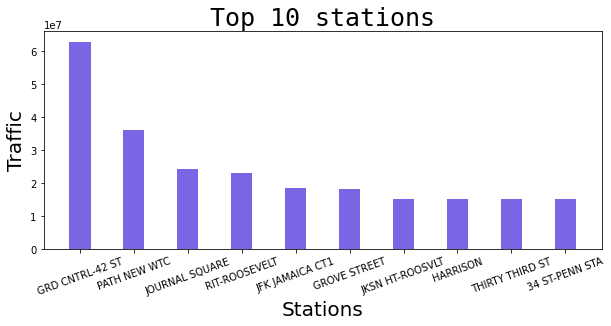

In [817]:
fig = plt.figure(figsize = (10,4))
plt.bar(top_traffic.STATION,top_traffic.TRAFFIC, color='#7966e4' ,width=0.4)
plt.xlabel('Stations',fontsize=20)
plt.ylabel('Traffic',fontsize=20)
plt.title('Top 10 stations',fontsize=25,family='monospace')
plt.xticks(rotation=20);
plt.savefig('plot1.png', dpi=70, bbox_inches='tight')

# 2nd Graph - Traffic flow by weekday for 5 top stations

In [842]:
top5 = Daily.loc[(Daily['STATION'] == 'GRD CNTRL-42 ST') | (Daily['STATION'] == 'PATH NEW WTC') 
| (Daily['STATION'] == 'JOURNAL SQUARE') | (Daily['STATION'] == 'RIT-ROOSEVELT') 
| (Daily['STATION'] == 'JFK JAMAICA CT1')]

In [851]:
# add parsed time column
top5['parsed_time'] = top5['TIME'].apply(parse)
top5

<ipython-input-851-6e87cb6dda3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['parsed_time'] = top5['TIME'].apply(parse)


,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,INDEX_OF_WEEKDAYS,DAY_OF_WEEK,parsed_time
2453932,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 19:00:00,6297930,December,19:00:00,12/28/2018,15698475,15698875.0,6298248.0,400.0,318.0,718.0,4,Friday,2021-10-10 19:00:00
2453931,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 15:00:00,6297388,December,15:00:00,12/28/2018,15697431,15698475.0,6297930.0,1044.0,542.0,1586.0,4,Friday,2021-10-10 15:00:00
2453930,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 11:00:00,6296712,December,11:00:00,12/28/2018,15696701,15697431.0,6297388.0,730.0,676.0,1406.0,4,Friday,2021-10-10 11:00:00
2453929,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 07:00:00,6296509,December,07:00:00,12/28/2018,15696086,15696701.0,6296712.0,615.0,203.0,818.0,4,Friday,2021-10-10 07:00:00
2453928,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 03:00:00,6296485,December,03:00:00,12/28/2018,15696015,15696086.0,6296509.0,71.0,24.0,95.0,4,Friday,2021-10-10 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978932,PTH22,R540,PATH NEW WTC,00-02-02,2018-12-28 06:13:02,0,December,06:13:02,12/28/2018,0,0.0,0.0,0.0,0.0,0.0,4,Friday,2021-10-10 06:13:02
1978981,PTH22,R540,PATH NEW WTC,00-02-03,2018-01-07 08:50:09,0,January,08:50:09,01/07/2018,0,25.0,7.0,25.0,7.0,32.0,6,Sunday,2021-10-10 08:50:09
1979087,PTH22,R540,PATH NEW WTC,00-02-03,2018-01-25 23:15:01,0,January,23:15:01,01/25/2018,0,0.0,0.0,0.0,0.0,0.0,3,Thursday,2021-10-10 23:15:01
1979554,PTH22,R540,PATH NEW WTC,00-02-03,2018-12-04 12:27:02,0,December,12:27:02,12/04/2018,0,0.0,0.0,0.0,0.0,0.0,1,Tuesday,2021-10-10 12:27:02


In [852]:
# create a list parsed by time for our five candidate stations
stations_5 = ['GRD CNTRL-42 ST','PATH NEW WTC','JOURNAL SQUARE','RIT-ROOSEVELT','JFK JAMAICA CT1']

top_stations = top5[top5['STATION'].isin(stations_5)]
top_stations = top_stations.groupby(by=['STATION', 'parsed_time'], as_index=False).sum()[['STATION', 'parsed_time','TRAFFIC']]
top_stations.set_index('parsed_time', drop=True, inplace=True)
top_stations = top_stations.groupby(by=['STATION']).resample('4H').mean()
top_stations = top_stations.reset_index()

In [853]:
# create a list parsed by weekday for our candidate stations
traffic_per_weekday = top5[top5['STATION'].isin(stations_5)]
traffic_per_weekday = traffic_per_weekday.groupby(['STATION','INDEX_OF_WEEKDAYS','C/A'])[['TRAFFIC']].sum().sort_values(['TRAFFIC','INDEX_OF_WEEKDAYS'],ascending=[False,False]).reset_index()
traffic_per_weekday.head(20)

,STATION,INDEX_OF_WEEKDAYS,C/A,TRAFFIC
0,PATH NEW WTC,4,PTH22,15759987.0
1,GRD CNTRL-42 ST,4,R238,14089954.0
2,GRD CNTRL-42 ST,4,R240,12773570.0
3,JOURNAL SQUARE,4,PTH03,11217222.0
4,GRD CNTRL-42 ST,4,R236,8356671.0
5,GRD CNTRL-42 ST,3,R240,7166534.0
6,GRD CNTRL-42 ST,2,R240,7142940.0
7,JFK JAMAICA CT1,4,JFK03,6139452.0
8,GRD CNTRL-42 ST,0,R240,5790401.0
9,RIT-ROOSEVELT,4,TRAM2,5383905.0


In [854]:
# rename labels by day of week

traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 0, 'DAY_OF_WEEK'] = 'Monday'
traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 1, 'DAY_OF_WEEK'] = 'Tuesday'
traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 2, 'DAY_OF_WEEK'] = 'Wednesday'
traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 3, 'DAY_OF_WEEK'] = 'Thursday'
traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 4, 'DAY_OF_WEEK'] = 'Friday'
traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 5, 'DAY_OF_WEEK'] = 'Saturday'
traffic_per_weekday.loc[traffic_per_weekday['INDEX_OF_WEEKDAYS'] == 6, 'DAY_OF_WEEK'] = 'Sunday'

/Users/renadalbishri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


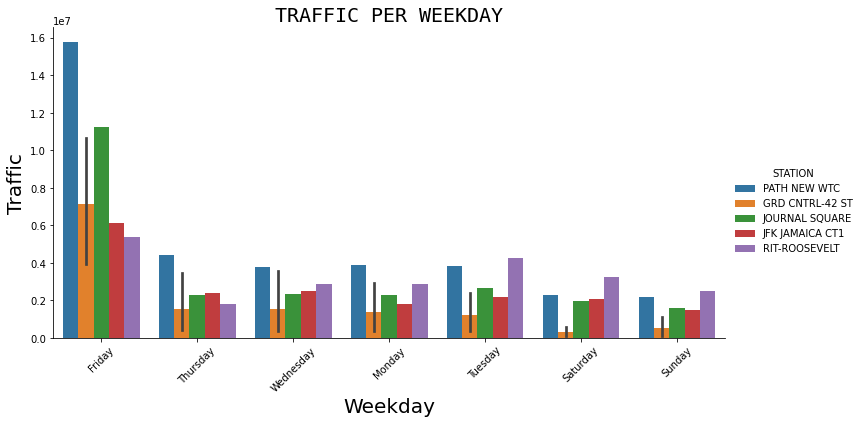

In [855]:
weekday_bar = sns.catplot('DAY_OF_WEEK', 'TRAFFIC', hue ='STATION', kind = 'bar', data = traffic_per_weekday, aspect = 2)
plt.xticks(rotation=45)
plt.xlabel('Weekday',fontsize=20)
plt.ylabel('Traffic',fontsize=20)
plt.title('TRAFFIC PER WEEKDAY',family='monospace',fontsize=20)
plt.savefig('plot2.png', dpi=70, bbox_inches='tight')

# 3rd Graph - Monthly traffic for 3 top stations

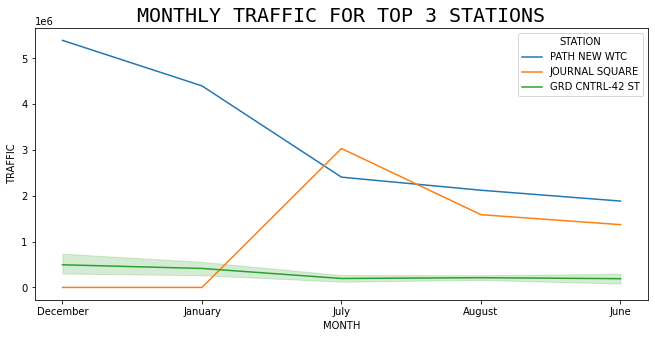

<Figure size 432x288 with 0 Axes>

In [836]:
stations_3 = ['GRD CNTRL-42 ST','PATH NEW WTC','JOURNAL SQUARE']
station_grp = turnstiles.groupby(['STATION', 'MONTH','C/A'])['TRAFFIC'].sum().sort_values(ascending = False).reset_index()
top3_stations = station_grp[station_grp['STATION'].isin(stations_3)]
plt.figure(figsize=(11,5))

plt.title('MONTHLY TRAFFIC FOR TOP 3 STATIONS',family='monospace',fontsize = 20,loc='CENTER',color='black');
sns.lineplot(data = top3_stations, x = top3_stations.MONTH, y = top3_stations.TRAFFIC, hue = 'STATION')
plt.show()
plt.savefig('plot3.png', dpi=70, bbox_inches='tight')


In [825]:
mask=(Daily["STATION"] == 'GRD CNTRL-42 ST')
Daily[mask].head()

,C/A,UNIT,STATION,SCP,DATE_TIME,EXITS,MONTH,TIME,DATE,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,INDEX_OF_WEEKDAYS,DAY_OF_WEEK
2453932,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 19:00:00,6297930,December,19:00:00,12/28/2018,15698475,15698875.0,6298248.0,400.0,318.0,718.0,4,Friday
2453931,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 15:00:00,6297388,December,15:00:00,12/28/2018,15697431,15698475.0,6297930.0,1044.0,542.0,1586.0,4,Friday
2453930,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 11:00:00,6296712,December,11:00:00,12/28/2018,15696701,15697431.0,6297388.0,730.0,676.0,1406.0,4,Friday
2453929,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 07:00:00,6296509,December,07:00:00,12/28/2018,15696086,15696701.0,6296712.0,615.0,203.0,818.0,4,Friday
2453928,R238,R046,GRD CNTRL-42 ST,00-03-00,2018-12-28 03:00:00,6296485,December,03:00:00,12/28/2018,15696015,15696086.0,6296509.0,71.0,24.0,95.0,4,Friday


# 4th Graph - Traffic average for 5 top stations

In [826]:
top6 = Daily.loc[(Daily['STATION'] == 'GRD CNTRL-42 ST') | (Daily['STATION'] == 'PATH NEW WTC') 
| (Daily['STATION'] == 'JOURNAL SQUARE') | (Daily['STATION'] == 'RIT-ROOSEVELT') 
| (Daily['STATION'] == 'JFK JAMAICA CT1')]

In [827]:
stations_10=['GRD CNTRL-42 ST','PATH NEW WTC','JOURNAL SQUARE','RIT-ROOSEVELT','JFK JAMAICA CT1']

top_stations2 = top6[top6['STATION'].isin(stations_10)]
top_stations2 = top_stations2.groupby(by=['STATION','C/A'], as_index=False)[['TRAFFIC']].mean().sort_values(by='TRAFFIC',ascending=False)
top_stations2

,STATION,C/A,TRAFFIC
5,GRD CNTRL-42 ST,R240,11591.968957
10,RIT-ROOSEVELT,TRAM2,5543.536232
7,JFK JAMAICA CT1,JFK03,2405.380052
3,GRD CNTRL-42 ST,R238,2292.648947
2,GRD CNTRL-42 ST,R237B,1768.864596
8,JOURNAL SQUARE,PTH03,1459.634162
0,GRD CNTRL-42 ST,R236,1432.356140
4,GRD CNTRL-42 ST,R238A,1239.247917
9,PATH NEW WTC,PTH22,1052.608878
6,GRD CNTRL-42 ST,R241A,1015.470743


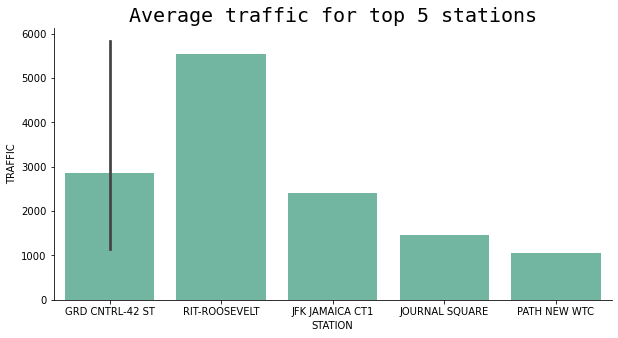

In [837]:
plt.figure(figsize=[10,5])
sns.barplot(x = 'STATION',y='TRAFFIC',data=top_stations2,palette = sns.color_palette("Set2",1)); #3 is the color numbers
plt.title('Average traffic for top 5 stations',fontsize=20,family='monospace')
sns.despine()
plt.savefig('plot4.png')